In [ ]:
import pandas as pd   # module to work with data in DataFrames.
import seaborn as sns  # module to plot DataFrames in an easy way
import matplotlib.pyplot as plt
import numpy as np
import os
sns.set_context('poster') # other optionss are: 'poster', 'notebook'
# from google.colab import drive 
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
input_dir = "./sample_data"
file1 = os.path.join(input_dir, "data.csv") 
file2 =  os.path.join(input_dir,  "dataset/data-infos.csv") 

# read orignal data
odf = pd.read_csv(file1, encoding = "ISO-8859-1")

# read info data
idf = pd.read_csv(file2, encoding = "ISO-8859-1", sep = ';')



In [ ]:
# explore orignal data
odf

In [ ]:
# explore info data
idf

,ï»¿Picture Series,Picture,Price,Gallery,Category,Link
0,0,0,"0,2",KPR,1,https://opensea.io/assets/ethereum/0xcb1021080...
1,0,1,"0,17",KPR,1,https://opensea.io/assets/ethereum/0xcb1021080...
2,0,2,"0,1499",KPR,1,https://opensea.io/assets/ethereum/0xcb1021080...
3,0,3,"0,129",KPR,1,https://opensea.io/assets/ethereum/0xcb1021080...
4,0,4,"0,12",KPR,1,https://opensea.io/assets/ethereum/0xcb1021080...
...,...,...,...,...,...,...
95,19,0,"0,88",WMN,2,https://opensea.io/assets/ethereum/0xbee7cb80d...
96,19,1,"0,88",WMN,2,https://opensea.io/assets/ethereum/0xbee7cb80d...
97,19,2,"0,88",WMN,2,https://opensea.io/assets/ethereum/0xbee7cb80d...
98,19,3,"0,88",WMN,2,https://opensea.io/assets/ethereum/0xbee7cb80d...


In [ ]:
def get_rankings(df, columns, grp):
    rank_list = []


    # collect data
    for c in columns:
        rank_list.append(df[c].values[1:])
    rank_list = (np.vstack(rank_list)).T
    rank_list = rank_list.astype(float)
    # print(rank_list)

    # clean data, remove rows containing NaN
    nan_mask = np.isnan(rank_list).any(axis=1)
    rank_list = rank_list[~nan_mask]
    # print(rank_list)

    ranking_sum = np.sum(rank_list, axis=0)
    ranking_average = np.average(rank_list, axis=0)
    ranking_std = np.std(rank_list, axis=0)

    return {"ranking_sum": ranking_sum,
            "ranking_average":ranking_average,
            "ranking_std":ranking_std}

In [ ]:
# df = pd.read_csv(file2, encoding="latin-1")

num_images_per_group = 5
num_of_groups = 20
ranking_sums = []
ranking_avgs = []


for grp in range(num_of_groups):
    if grp+1 <10:
        columns = [f"B00{grp+1}_0{i+1}" for i in range(num_images_per_group)]
    else:
        columns = [f"B0{grp+1}_0{i+1}" for i in range(num_images_per_group)]

    ranking_res = get_rankings(odf, columns, grp+1)
    ranking_sums.append(ranking_res['ranking_sum'])
    ranking_avgs.append(ranking_res['ranking_average'])
# print(ranking_sums)
ranking_sums = np.hstack(np.array(ranking_sums))
ranking_avgs = np.hstack(np.array(ranking_avgs))
# print(ranking_sums)

In [ ]:
price_in_str = idf['Price'].values
prices = [float(p.replace(',', '.')) for p in price_in_str]
print(prices)

[0.2, 0.17, 0.1499, 0.129, 0.12, 3.1, 1.99, 1.111, 0.9, 0.75, 1.0, 0.5, 0.38, 0.2, 0.78, 75.0, 55.0, 45.0, 28.75, 15.0, 1.2, 1.0, 0.75, 0.5, 0.4207, 2.0, 1.2, 0.99, 0.69, 0.25, 1.0, 0.8, 0.68, 0.5, 0.349, 2.5, 2.2, 1.65, 1.25, 0.98, 130.0, 100.0, 69.0, 49.0, 30.0, 100.0, 85.69, 55.0, 40.666, 4.5, 1.38, 0.5, 0.39, 0.32, 0.3, 0.37, 0.295, 0.25, 0.15, 0.12, 0.48, 0.419, 0.339, 0.25, 0.2, 0.05, 0.04, 0.32, 0.028, 0.026, 70.0, 60.0, 47.0, 40.0, 29.37, 0.1, 0.1, 0.1, 0.9, 0.9, 0.25, 0.25, 0.25, 0.25, 0.25, 0.21, 0.21, 0.21, 0.2, 0.2, 0.25, 0.25, 0.25, 0.25, 0.25, 0.88, 0.88, 0.88, 0.88, 0.88]


[Text(0, 0.5, 'Ranking (Sum) [10, 200]'), Text(0.5, 0, 'Prices [0,2]')]

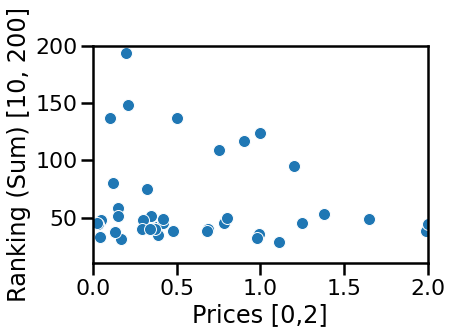

In [ ]:
data = {}
for key, val in zip(prices, ranking_sums): 
    data[key] = data.get(key, 0) + val 

grouped_prices_sum = data.keys()
grouped_rankings = data.values()


g = sns.scatterplot(x=grouped_prices_sum, y=grouped_rankings)
g.set(xlim=(0, 2.0))
g.set(ylim=(10, 200))
g.set(xlabel='Prices [0,2]', ylabel='Ranking (Sum) [10, 200]')


[Text(0, 0.5, 'Ranking (Sum) [10, 200]'), Text(0.5, 0, 'Prices [2,150]')]

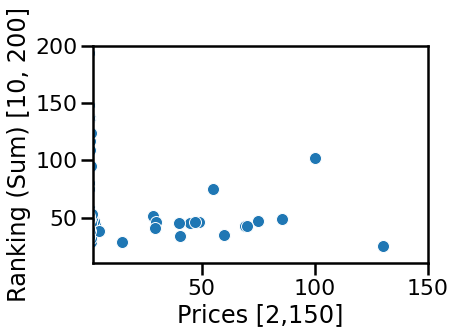

In [ ]:
g = sns.scatterplot(x=grouped_prices_sum, y=grouped_rankings)
g.set(xlim=(2.0, 150))
g.set(ylim=(10, 200))
g.set(xlabel='Prices [2,150]', ylabel='Ranking (Sum) [10, 200]')

[Text(0, 0.5, 'Ranking (AVG) [0,20]'), Text(0.5, 0, 'Prices [0,2]')]

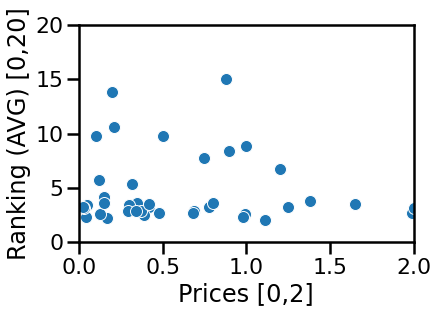

In [ ]:
data = {}
for key, val in zip(prices, ranking_avgs): 
    data[key] = data.get(key, 0) + val 

grouped_prices_sum = data.keys()
grouped_rankings = data.values()


g = sns.scatterplot(x=grouped_prices_sum, y=grouped_rankings)
g.set(xlim=(0, 2.0))
g.set(ylim=(0,20))
g.set(xlabel='Prices [0,2]', ylabel='Ranking (AVG) [0,20]')


[Text(0, 0.5, 'Ranking (AVG) [0, 20]'), Text(0.5, 0, 'Prices [0,2]')]

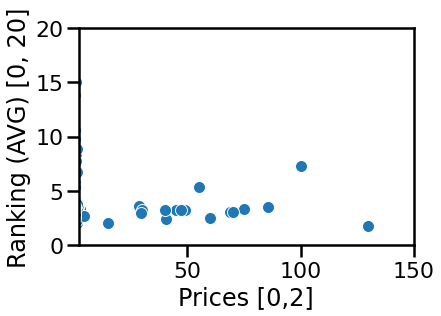

In [ ]:
data = {}
for key, val in zip(prices, ranking_avgs): 
    data[key] = data.get(key, 0) + val 

grouped_prices_sum = data.keys()
grouped_rankings = data.values()


g = sns.scatterplot(x=grouped_prices_sum, y=grouped_rankings)
g.set(xlim=(2.0, 150))
g.set(ylim=(0,20))
g.set(xlabel='Prices [0,2]', ylabel='Ranking (AVG) [0, 20]')
